# Unsupervised Learning with PCA and Clustering

## 1. Introduction
- Brief explanation of the dataset.
- Objectives: Apply unsupervised learning to discover hidden patterns in the wine dataset.
- Techniques used: Clustering (K-Means, DBSCAN) and Dimensionality Reduction (PCA).

---

## 2. Data Preprocessing
### 2.1 Data Scaling
- Standardized the data using `StandardScaler` for optimal performance in clustering and PCA.
- Explanation of why scaling is necessary.

---

## 3. Initial Clustering
### 3.1 K-Means Clustering
- Performed K-Means clustering with default parameters.
- Added cluster labels to the dataset for analysis.

### 3.2 Cluster Analysis
- Examined the mean values of features in each cluster.
- Visualized clusters using scatter plots for key features.

---

## 4. Optimization of Clustering
### 4.1 Elbow Method
- Applied the Elbow Method to determine the optimal number of clusters for K-Means.
- Visualized the inertia for different cluster numbers.

### 4.2 Silhouette Analysis
- Conducted silhouette analysis to validate the optimal cluster number.

---

## 5. DBSCAN Clustering
### 5.1 Initial DBSCAN Results
- Applied DBSCAN with default parameters.
- Visualized clusters and outliers.

### 5.2 Parameter Optimization
- Tuned `eps` and `min_samples` using a grid search approach.
- Visualized DBSCAN results with the best parameters.
- Evaluated clustering performance using the Silhouette Score.

---

## 6. Dimensionality Reduction with PCA
### 6.1 PCA Components
- Identified the number of principal components required to retain 95% variance.
- Visualized the cumulative explained variance.

### 6.2 PCA Visualization
- Reduced data to two dimensions for visualization.
- Visualized the PCA-transformed data with cluster labels from K-Means and DBSCAN.

### 6.3 Clustering on PCA Data
- Re-applied K-Means and DBSCAN to PCA-transformed data.
- Evaluated performance using Silhouette Scores.

---

## 7. Insights and Conclusions
- Summarized findings from clustering and dimensionality reduction.
- Discussed implications of clustering results and how they relate to the dataset.
- Highlighted next steps for further analysis or refinement.

---

## 8. References
- Mentioned relevant documentation or tutorials used in the project.



## 1 Import Libraries

In [95]:
# Import necessary libraries for data manipulation, visualization, and clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score

import os
os.environ["OMP_NUM_THREADS"] = "6"

## 1.1 Load Preprocessed Data

In [98]:
# Load the cleaned dataset from the previous analysis
df = pd.read_csv("../data/cleaned_dataset.csv")

## 2 Clustering

### 2.1 Scale Data

In [102]:
from sklearn.preprocessing import StandardScaler

# Seleccionar variables numéricas (excluyendo 'quality')
X = df.drop(columns=['quality'])

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para inspeccionar
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(scaled_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.524431          0.932000    -1.393258       -0.461157  -0.245623   
1      -0.294063          1.915800    -1.393258        0.056665   0.200094   
2      -0.294063          1.259934    -1.188617       -0.165259   0.078535   
3       1.664067         -1.363534     1.471711       -0.461157  -0.265883   
4      -0.524431          0.713378    -1.393258       -0.535132  -0.265883   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.468554             -0.384050  0.584003  1.291872  -0.578561   
1             0.872003              0.604073  0.048737 -0.708395   0.124822   
2            -0.085537              0.214813  0.155790 -0.321247  -0.051024   
3             0.105971              0.394471  0.691057 -0.966495  -0.461331   
4            -0.277045             -0.204391  0.584003  1.291872  -0.578561   

    alcohol  
0 -0.954374  
1 -0.584575  
2 -0.584575  


### 2.2 Clustering with K-Means

In [105]:
from sklearn.cluster import KMeans

# Iniciar K-Means con un número inicial de clústeres (por ejemplo, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clústeres
labels = kmeans.labels_

# Añadir las etiquetas al DataFrame original
df['Cluster'] = labels

# Mostrar las primeras filas del DataFrame con las etiquetas
print(df.head().T)


                            0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.6600
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.8000
chlorides              0.0760   0.0980   0.092   0.075   0.0750
free sulfur dioxide   11.0000  25.0000  15.000  17.000  13.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  40.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000
Cluster                2.0000   0.0000   2.000   1.000   2.0000


C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


### 2.3 Clusters Analysis

In [12]:
# Agrupar por clúster y calcular la media de las características
cluster_summary = df.groupby('Cluster').mean().T
print(cluster_summary)

Cluster                       0          1          2
fixed acidity          8.168025  10.030162   7.168309
volatile acidity       0.534357   0.405916   0.614368
citric acid            0.292915   0.469072   0.122315
residual sugar         3.009875   2.574826   2.232184
chlorides              0.087483   0.101974   0.078657
free sulfur dioxide   26.967085  11.243619  13.383415
total sulfur dioxide  90.841693  31.000000  34.970443
density                0.997246   0.997500   0.995868
pH                     3.276834   3.194872   3.408374
sulphates              0.625141   0.757610   0.606289
alcohol                9.835371  10.751353  10.519212
quality                5.322884   5.965197   5.538588


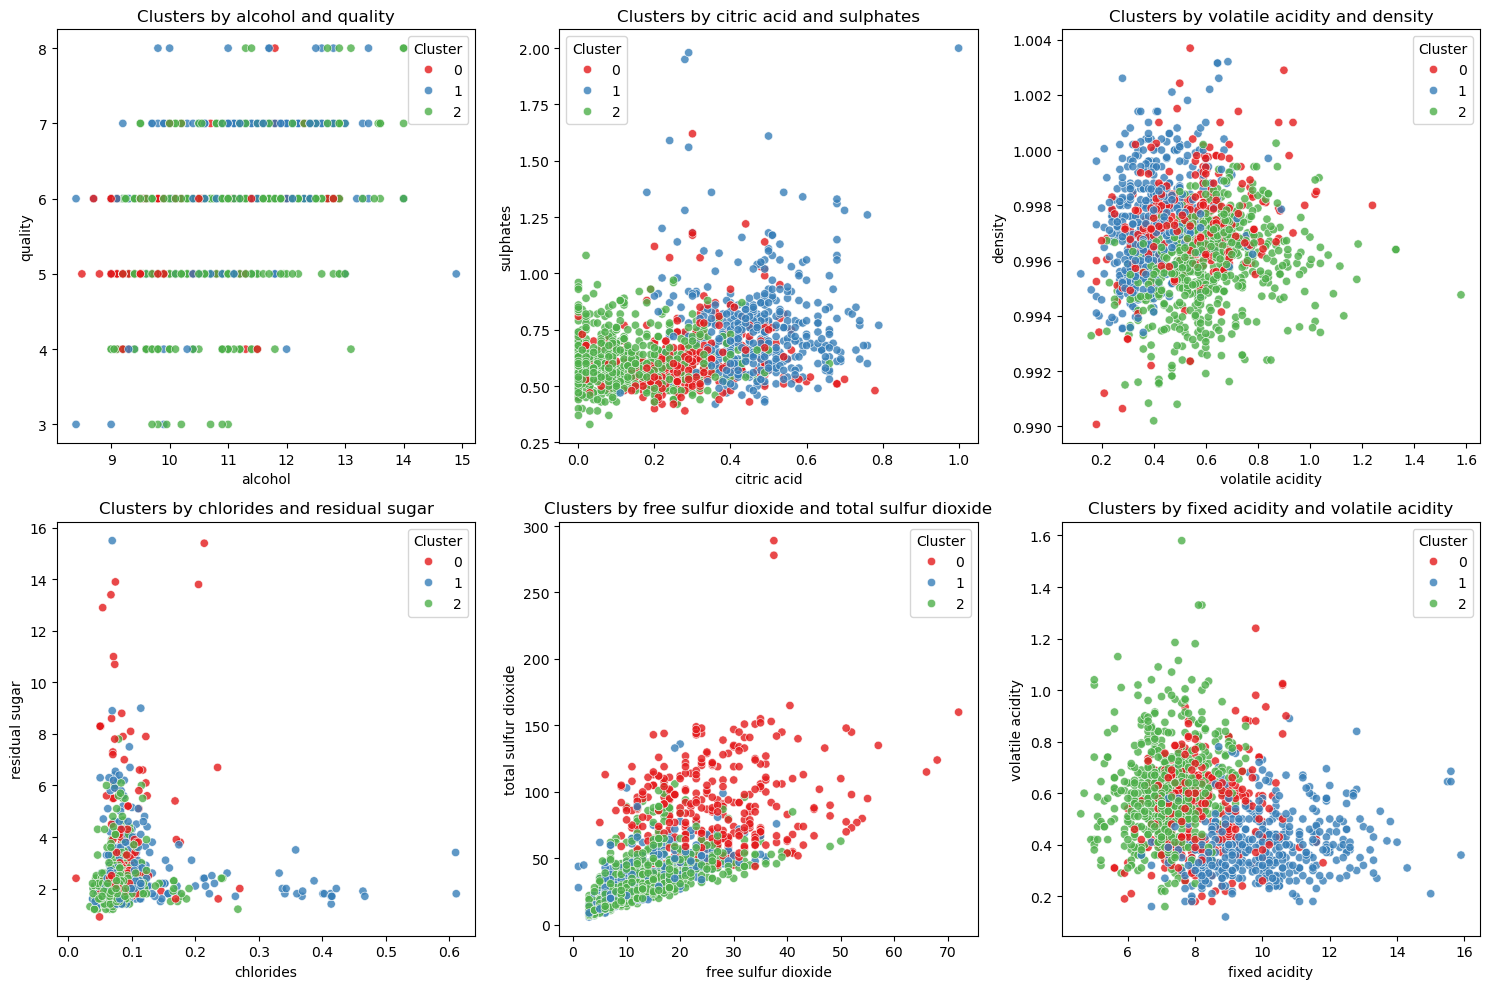

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pares de características a analizar
pairs = [
    ('alcohol', 'quality'),
    ('citric acid', 'sulphates'),
    ('volatile acidity', 'density'),
    ('chlorides', 'residual sugar'),
    ('free sulfur dioxide','total sulfur dioxide'),
    ('fixed acidity','volatile acidity')
]

# Crear un gráfico para cada par de características
plt.figure(figsize=(15, 10))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(
        data=df, x=x, y=y, hue='Cluster', palette='Set1', alpha=0.8
    )
    plt.title(f'Clusters by {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


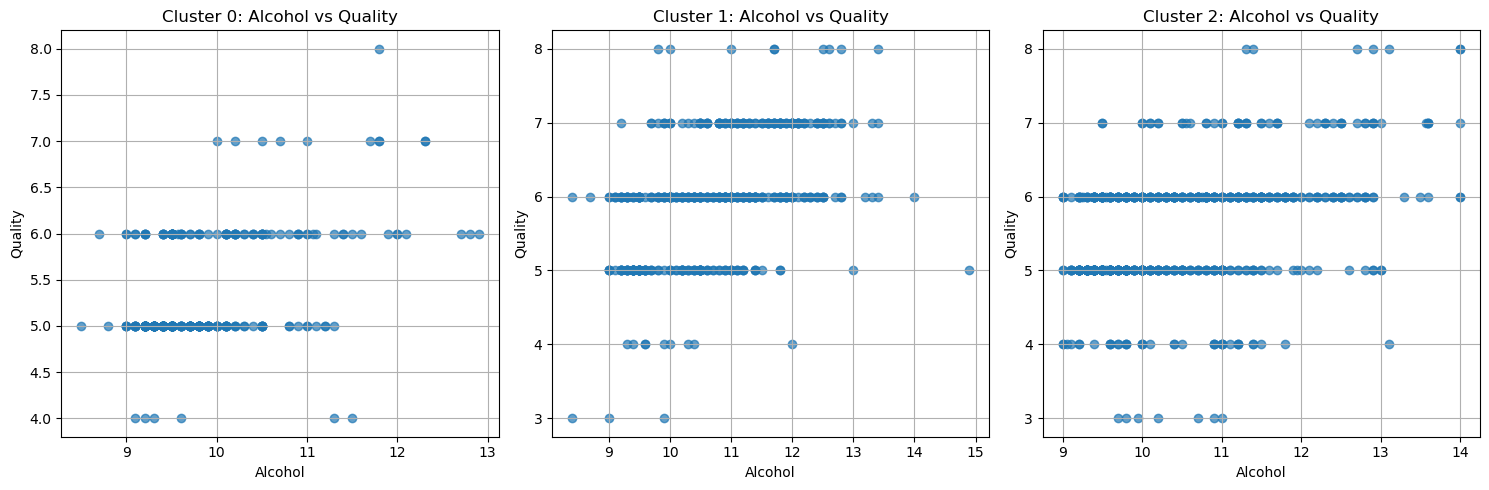

In [14]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# Iterar sobre cada cluster
for cluster_id in sorted(df['Cluster'].unique()):
    # Filtrar los datos del cluster actual
    cluster_data = df[df['Cluster'] == cluster_id]
    
    # Crear un subplot para cada cluster
    plt.subplot(1, 3, cluster_id + 1)  # Tres columnas de gráficos
    plt.scatter(cluster_data['alcohol'], cluster_data['quality'], alpha=0.7)
    plt.title(f"Cluster {cluster_id}: Alcohol vs Quality")
    plt.xlabel("Alcohol")
    plt.ylabel("Quality")
    plt.grid(True)

# Ajustar los gráficos
plt.tight_layout()
plt.show()


### 3.1 Get best number of clusters using elbow & silhouette methods

#### 3.1.1 Elbow Method

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

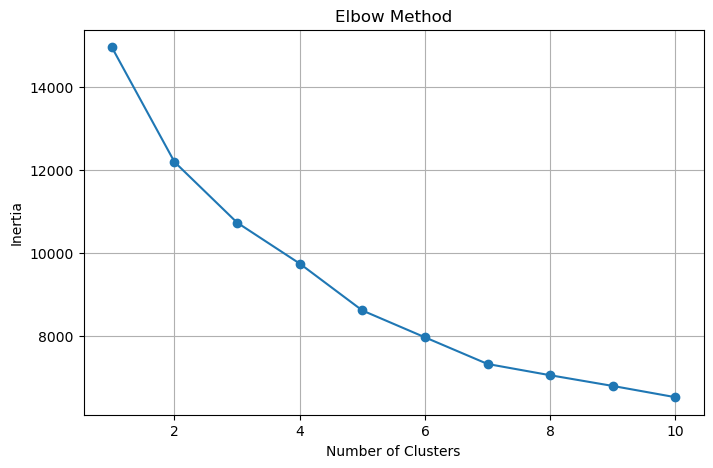

In [17]:
# Probar diferentes números de clusters
inertia = []
cluster_range = range(1, 11)  # Probar de 1 a 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Now we'r going to see the silhouette method to check best cluster based on elbow method

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of clusters: 2, Silhouette Score: 0.20
Number of clusters: 3, Silhouette Score: 0.19
Number of clusters: 4, Silhouette Score: 0.17


C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of clusters: 5, Silhouette Score: 0.19
Number of clusters: 6, Silhouette Score: 0.19
Number of clusters: 7, Silhouette Score: 0.19


C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of clusters: 8, Silhouette Score: 0.19
Number of clusters: 9, Silhouette Score: 0.18
Number of clusters: 10, Silhouette Score: 0.15


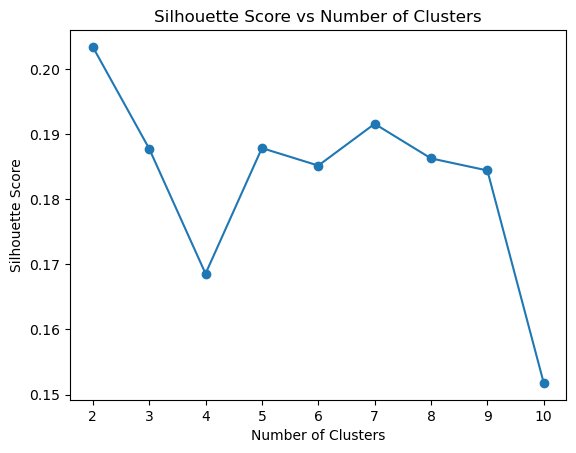

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 11):  # Evalúa de 2 a 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append((n_clusters, score))
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score:.2f}")

# Graficar los resultados
import matplotlib.pyplot as plt

clusters, scores = zip(*silhouette_scores)
plt.plot(clusters, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Test againt K-Means with 2 clusters

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


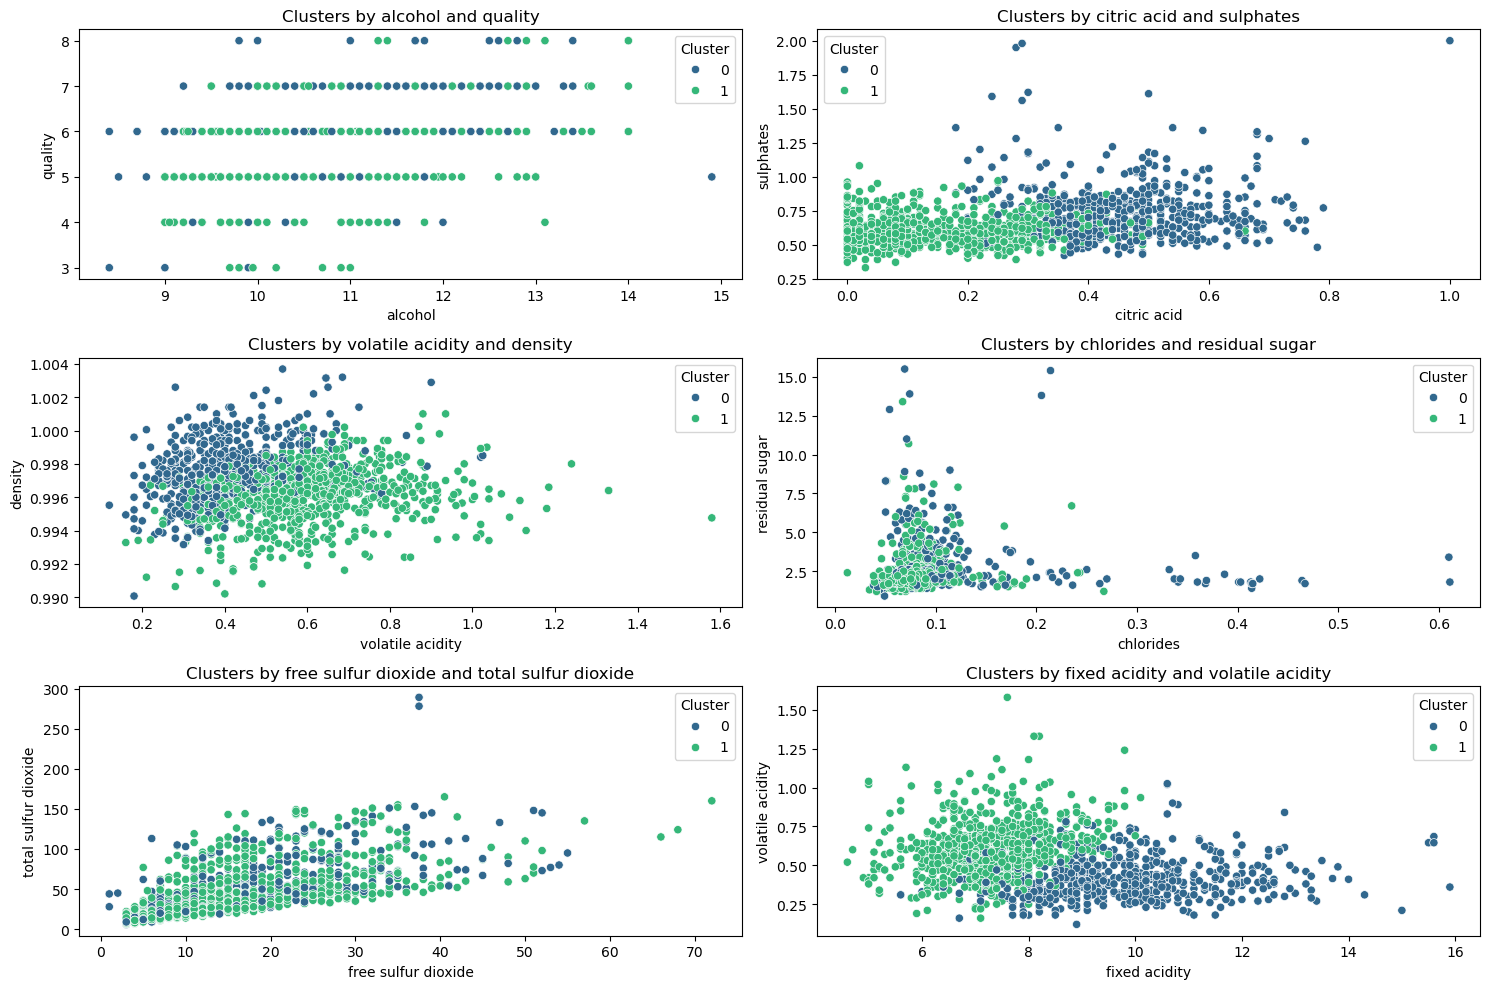

In [37]:
# Ajustar el modelo para 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
labels_2 = kmeans_2.fit_predict(X_scaled)

# Agregar las etiquetas al DataFrame
df['Cluster_2'] = labels_2

# Graficar los clusters en múltiples combinaciones
features_pairs = [
    ('alcohol', 'quality'),
    ('citric acid', 'sulphates'),
    ('volatile acidity', 'density'),
    ('chlorides', 'residual sugar'),
    ('free sulfur dioxide', 'total sulfur dioxide'),
    ('fixed acidity', 'volatile acidity')
]

plt.figure(figsize=(15, 10))
for i, (x_feature, y_feature) in enumerate(features_pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=x_feature, y=y_feature, hue='Cluster_2', palette='viridis')
    plt.title(f"Clusters by {x_feature} and {y_feature}")
    plt.legend(title="Cluster", loc='best')
plt.tight_layout()
plt.show()


In [35]:
cluster_summary_2 = df.groupby('Cluster_2').mean().T
print(cluster_summary_2)

Cluster_2                     0          1
fixed acidity          9.745617   7.307875
volatile acidity       0.419436   0.606369
citric acid            0.453435   0.145787
residual sugar         2.749642   2.365312
chlorides              0.099932   0.079872
free sulfur dioxide   15.091234  16.453750
total sulfur dioxide  45.162791  47.988125
density                0.997591   0.996093
pH                     3.208945   3.380250
sulphates              0.744633   0.598662
alcohol               10.564460  10.339979
quality                5.835420   5.475000
Cluster                0.769231   1.523750


#### Podemos ver que ahora se notan un poco mejor ambos grupos, ahora vamos a ver los parámetros más optimos para el DBSCAN y probar los clusters ahí

In [45]:
from sklearn.metrics import silhouette_score
import numpy as np

# Definir rangos para eps y min_samples
eps_values = np.arange(0.1, 2.0, 0.1)  # Rango de eps
min_samples_values = range(3, 10)      # Rango de min_samples

# Variables para guardar los mejores parámetros y el mejor Silhouette Score
best_eps = None
best_min_samples = None
best_score = -1  # Inicializar con -1 porque el Silhouette Score puede ser negativo

# Probar combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Calcular Silhouette Score (si hay más de un cluster)
        if len(set(labels)) > 1:  # Asegurarse de que haya al menos 2 clusters
            score = silhouette_score(X_scaled, labels)

            # Actualizar los mejores parámetros si el score mejora
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"\nBest parameters: eps = {best_eps}, min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")


Best parameters: eps = 1.7000000000000002, min_samples = 8, Silhouette Score = 0.2558


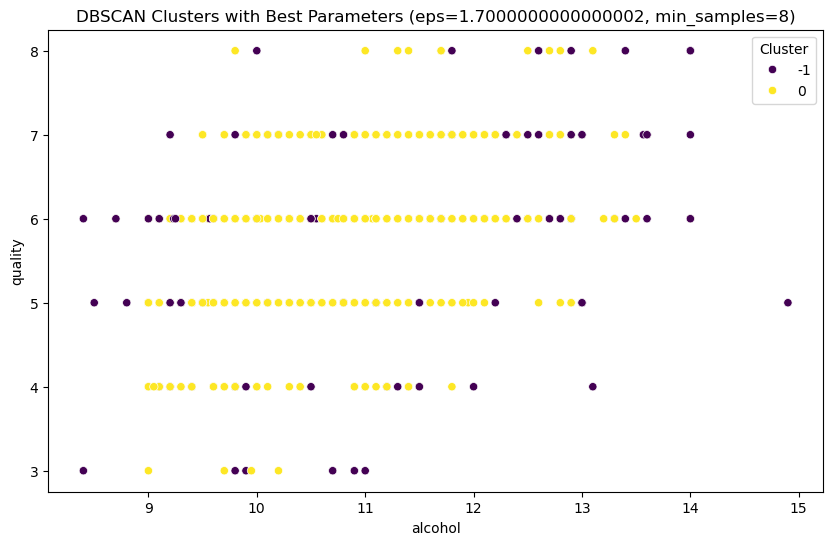

In [47]:
# Ajustar DBSCAN con los mejores parámetros
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_best = dbscan_best.fit_predict(X_scaled)

# Agregar etiquetas al DataFrame
df['DBSCAN_Best_Cluster'] = labels_best

# Visualizar con los mejores parámetros
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='quality', hue='DBSCAN_Best_Cluster', palette='viridis')
plt.title(f"DBSCAN Clusters with Best Parameters (eps={best_eps}, min_samples={best_min_samples})")
plt.legend(title="Cluster")
plt.show()

#### Vemos que se obtiene una mayor puntuación en el silhoutte usando estos parametros en DBSCAN que con los más optimos en K-Means

#### Por último vamos a reducir la dimesionalidad para intentar mejorar la interpretación de clusters

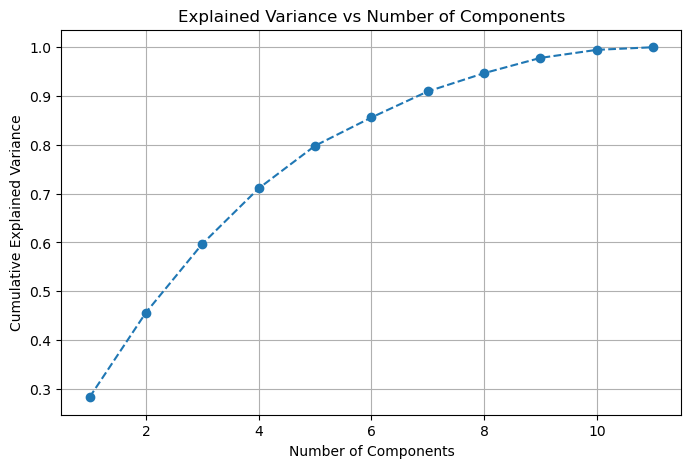

Number of components to explain 95% of variance: 9


In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Inicializar PCA
pca = PCA()

# Ajustar PCA a los datos escalados
pca.fit(X_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance)

# Graficar el codo (varianza acumulada)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()

# Imprimir el número de componentes necesarios para el 95% de varianza
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% of variance: {components_95}")


Explained Variance by Components:
PC1: 0.2829
PC2: 0.4564
PC3: 0.5971
PC4: 0.7108
PC5: 0.7981
PC6: 0.8561
PC7: 0.9094
PC8: 0.9469
PC9: 0.9782


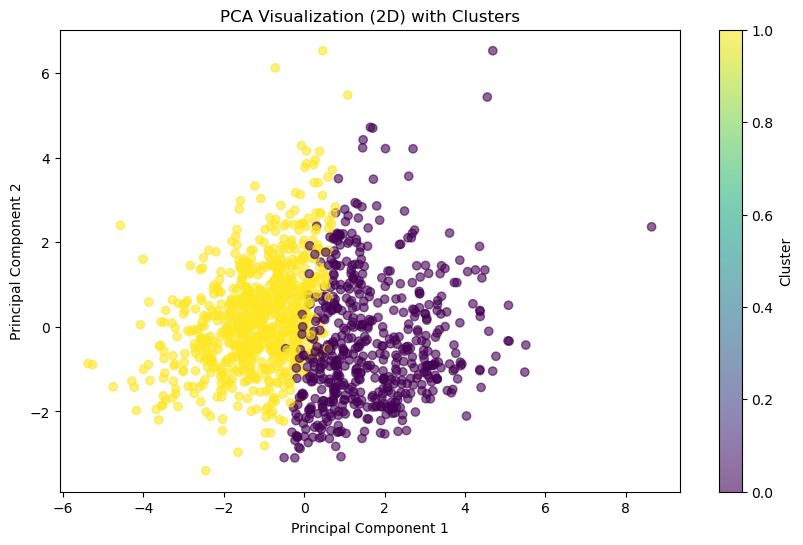

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Inicializar PCA con 9 componentes
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Mostrar la varianza explicada acumulada por los componentes
explained_variance = pca.explained_variance_ratio_.cumsum()
print("Explained Variance by Components:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")

# Visualización en 2D utilizando las dos primeras componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_2, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2D) with Clusters')
plt.show()


#### Reducir los datos a 9 componentes es lo más óptimo, al imprimir los dos primeros (mayoría datos), vemos dos claros grupos separados

#### Ahora vamos a volver a evaluar K-Means y DBSCAN con estos nuevos datos

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


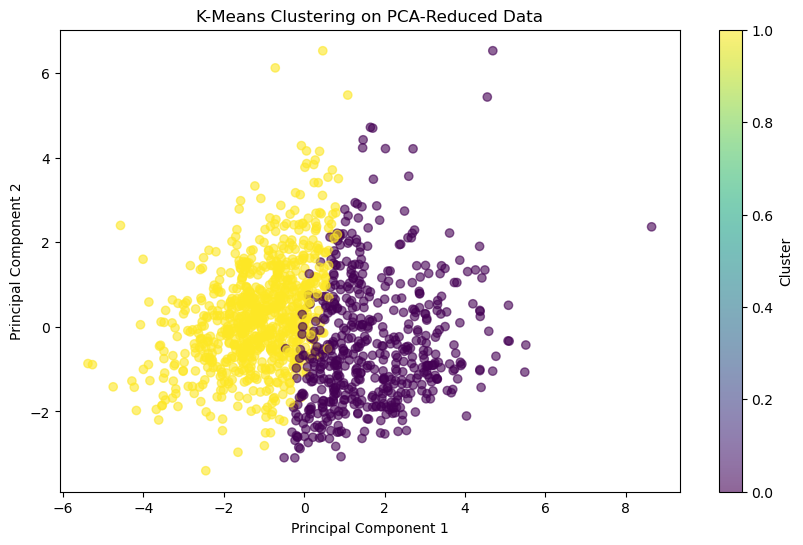

In [66]:
from sklearn.cluster import KMeans

# Aplicar K-Means a los datos transformados por PCA
kmeans_pca = KMeans(n_clusters=2, random_state=42)
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Visualizar los resultados de K-Means sobre los datos de PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pca, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.show()


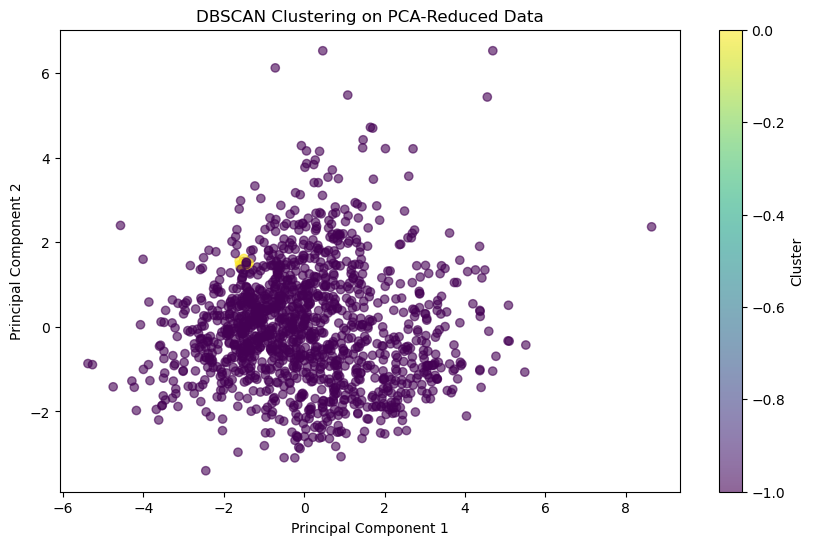

In [68]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN a los datos transformados por PCA
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_pca = dbscan_pca.fit_predict(X_pca)

# Visualizar los resultados de DBSCAN sobre los datos de PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan_pca, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.show()


In [70]:
from sklearn.metrics import silhouette_score

# Silhouette Score para K-Means en los datos de PCA
silhouette_kmeans_pca = silhouette_score(X_pca, labels_kmeans_pca)
print(f"Silhouette Score for K-Means on PCA data: {silhouette_kmeans_pca:.2f}")

# Silhouette Score para DBSCAN en los datos de PCA
silhouette_dbscan_pca = silhouette_score(X_pca, labels_dbscan_pca)
print(f"Silhouette Score for DBSCAN on PCA data: {silhouette_dbscan_pca:.2f}")


Silhouette Score for K-Means on PCA data: 0.21
Silhouette Score for DBSCAN on PCA data: -0.13


#### Default parameters of DBSCAN are not good, so lets search the best

In [72]:
from sklearn.metrics import silhouette_score
import numpy as np

# Definir rangos para eps y min_samples
eps_values = np.arange(0.1, 2.0, 0.1)  # Rango de eps
min_samples_values = range(3, 10)      # Rango de min_samples

# Variables para guardar los mejores parámetros y el mejor Silhouette Score
best_eps = None
best_min_samples = None
best_score = -1  # Inicializar con -1 porque el Silhouette Score puede ser negativo

# Probar combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)

        # Calcular Silhouette Score (si hay más de un cluster)
        if len(set(labels)) > 1:  # Asegurarse de que haya al menos 2 clusters
            score = silhouette_score(X_pca, labels)

            # Actualizar los mejores parámetros si el score mejora
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"\nBest parameters: eps = {best_eps}, min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")


Best parameters: eps = 1.9000000000000001, min_samples = 6, Silhouette Score = 0.3546


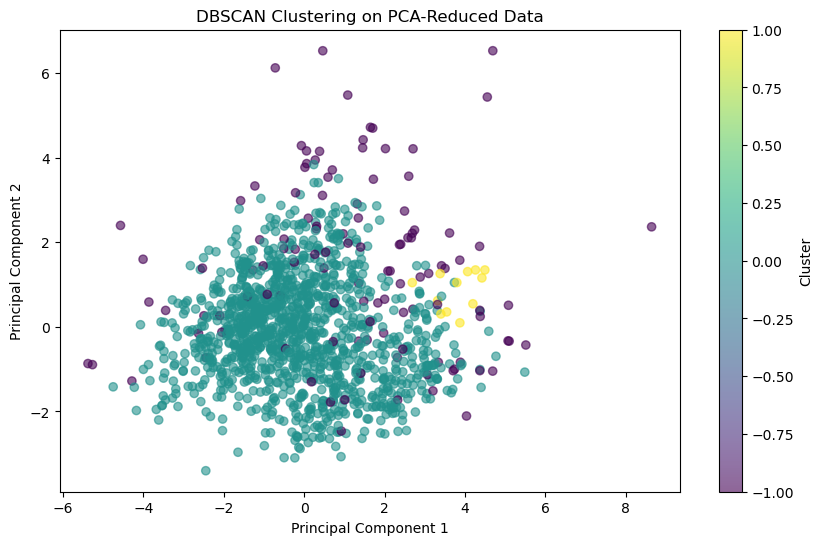

In [75]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN a los datos transformados por PCA
dbscan_pca = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan_pca = dbscan_pca.fit_predict(X_pca)

# Visualizar los resultados de DBSCAN sobre los datos de PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan_pca, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.show()

#### Improves to much